# Contents

- Regularization in CNN architectures
- Save and Load models
- Transfer Learning

In [0]:
# From https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


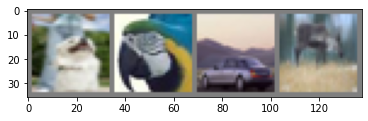

  dog  bird   car  deer


In [0]:
# From https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_features = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
          nn.Conv2d(6, 16, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2)
        )
        
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(16 * 5 * 5, 120),
          nn.ReLU(inplace=True),
          nn.Linear(120, 84),
          nn.ReLU(inplace=True),
          nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv_features(x)
        x = self.classifier(x)
        return x


net = Net()
print(net)
summary(net, (3, 32, 32))

Net(
  (conv_features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten()
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
        

In [0]:
# From https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.898
[1,  6000] loss: 1.713
[1,  8000] loss: 1.611
[1, 10000] loss: 1.553
[1, 12000] loss: 1.515
[2,  2000] loss: 1.417
[2,  4000] loss: 1.406
[2,  6000] loss: 1.386
[2,  8000] loss: 1.356
[2, 10000] loss: 1.345
[2, 12000] loss: 1.317
Finished Training


# Regularization

See:


*   https://pytorch.org/docs/stable/nn.html#dropout-layers
*   https://pytorch.org/docs/stable/nn.html#normalization-layers
*   https://pytorch.org/docs/stable/torchvision/transforms.html#






In [0]:
# Dropout, Dropout2D, BatchNorm

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv_features = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
          nn.BatchNorm2d(num_features=6),
          nn.Dropout2d(p=0.5),
          nn.Conv2d(6, 16, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
        )
        
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(16 * 5 * 5, 120),
          nn.Dropout(p=0.5),
          nn.ReLU(inplace=True),
          nn.Linear(120, 84),
          nn.ReLU(inplace=True),
          nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv_features(x)
        x = self.classifier(x)
        return x

net2 = Net2()
print(net2)

Net2(
  (conv_features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout2d(p=0.5, inplace=False)
    (5): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten()
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=120, out_features=84, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [0]:
# L1/L2 regularization
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv_features = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
          nn.Conv2d(6, 16, 5),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
        )
        
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(16 * 5 * 5, 120),
          nn.ReLU(inplace=True),
          nn.Linear(120, 84),
          nn.ReLU(inplace=True),
          nn.Linear(84, 10)
        )

        self.l2_reg_list = [
          self.conv_features[0],
          self.classifier[1]                     
        ]

    def forward(self, x):
        x = self.conv_features(x)
        x = self.classifier(x)
        return x
    
    def l2_reg_loss(self):
      reg_loss = 0
      for layer in self.l2_reg_list:
        reg_loss += (layer.weight ** 2).sum().sqrt()
      return reg_loss

net3 = Net3()
print(net3)
print('l2_reg_loss:', net3.l2_reg_loss())

# Demo-data
x = torch.rand((4, 3, 32, 32))
y = torch.randint(0, 10, (4, ), dtype=torch.long)
print(y)

criterion = nn.CrossEntropyLoss()

loss = criterion(net3(x), y)
print('Cls loss:', loss)

langrangian_value = 0.1
loss_cls = criterion(net3(x), y)

loss_reg = net3.l2_reg_loss()
loss = loss_cls + langrangian_value * loss_reg
print('Total loss:', loss)

Net3(
  (conv_features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten()
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)
l2_reg_loss: tensor(7.7394, grad_fn=<AddBackward0>)
tensor([9, 8, 0, 3])
Cls loss: tensor(2.3185, grad_fn=<NllLossBackward>)
Total loss: tensor(3.0924, grad_fn=<AddBackward0>)


Files already downloaded and verified
tensor(1.0000)


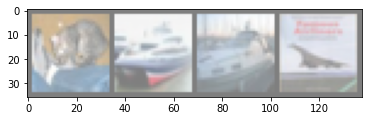

  cat  ship  ship plane


In [0]:
# Adversarial Training
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

class AdversarialAugmentation(object):
  def __init__(self, eps=0.001):
    super().__init__()
    self.eps = eps

  def __call__(self, x):
    x += self.eps * torch.randn_like(x)
    return x

transform = transforms.Compose([
  transforms.ToTensor(),
  AdversarialAugmentation(0.001)        
])


sampleset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
sampleloader = torch.utils.data.DataLoader(sampleset, batch_size=4,
                                           shuffle=False, num_workers=2)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(sampleloader)
images, labels = dataiter.next()
print(images.max())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Model Save/Load

In [0]:
# Save model 1!
PATH = './cifar10_net.pth'
torch.save(net.state_dict(), PATH)

In [0]:
# Load Model 
net1b = Net()
print('RandomInit vs Trained:', float((net.classifier[-1].weight - net1b.classifier[-1].weight).sum()))
net1b.load_state_dict(torch.load(PATH))
print('Loaded vs Trained:', float((net.classifier[-1].weight - net1b.classifier[-1].weight).sum()))



RandomInit vs Trained: 2.2416670322418213
Loaded vs Trained: 0.0


# Transfer Learning

In [0]:
# Define a new Net for 100 classes!
class TLNet(nn.Module):
    def __init__(self, base_net):
        super().__init__()
        self.conv_features = base_net.conv_features
        
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(16 * 5 * 5, 120),
          nn.ReLU(inplace=True),
          nn.Linear(100, 84),
        )


    def forward(self, x):
        x = self.conv_features(x)
        x = self.classifier(x)
        return x

tl_net = TLNet(net)
print(tl_net)
print('Proof of same weights in convs:', float((net.conv_features[0].weight - tl_net.conv_features[0].weight).sum()))


TLNet(
  (conv_features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten()
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=100, out_features=84, bias=True)
  )
)
Proof of same weights in convs: 0.0


In [0]:
# Use SGD to train specific parts of tl_net
import torch.optim

sgdA = torch.optim.SGD(tl_net.conv_features.parameters(), lr=0.1)
sgdB = torch.optim.RMSprop(tl_net.classifier[-1].parameters(), lr=0.001)
# Notes .zero_grad() and .step() must be called for each optimizer independently